# Support Vector Regressor - Utkarsh Gaikwad

In [1]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_samples=1000, n_features=2, n_targets=1,noise=3.0,random_state=21)

In [2]:
import pandas as pd
X = pd.DataFrame(X,columns=['x0','x1'])

In [3]:
X.head()

,x0,x1
0,0.927509,-0.248335
1,0.559137,0.283262
2,-0.076498,0.508445
3,0.012032,-0.463593
4,0.321719,0.744197


In [4]:
Y = pd.DataFrame(Y,columns=['target'])

In [5]:
Y.head()

,target
0,41.605736
1,49.500560
2,18.148246
3,-26.398557
4,48.617793


In [6]:
df = pd.concat([X,Y],axis=1)

<AxesSubplot: xlabel='x0', ylabel='x1'>

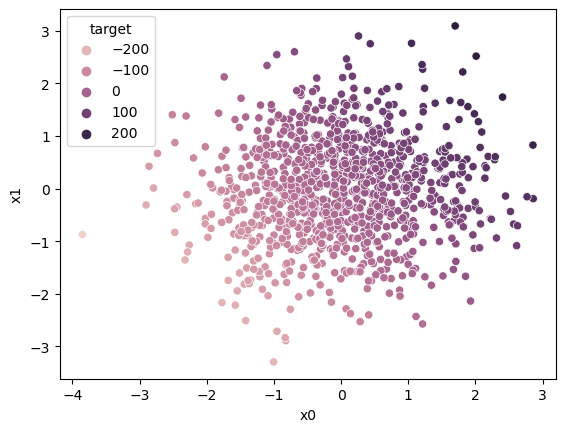

In [7]:
import seaborn as sns
sns.scatterplot(data=df,x='x0',y='x1',hue='target')

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25,random_state=21)

In [9]:
xtrain.shape

(750, 2)

In [10]:
xtest.shape

(250, 2)

### Training Support Vector Regressor

In [11]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [12]:
svr.fit(xtrain,ytrain.values.flatten())

SVR(kernel='linear')

## Predict Test data

In [13]:
ypred_test = svr.predict(xtest)
ypred_test[0:5]

array([ 41.64752714, -75.02995338,  56.64655622, -67.80908113,
        49.5084958 ])

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(ytest, ypred_test)
rmse = mse**0.5
mae = mean_absolute_error(ytest,ypred_test)
r2 = r2_score(ytest,ypred_test)
print(f'Mean Squared Error : {mse:.2f}')
print(f'Root Mean Squared Error : {rmse:.2f}')
print(f'Mean Absolute Error : {mae:.2f}')
print(f'R2 Score : {r2:.4f}')

Mean Squared Error : 9.37
Root Mean Squared Error : 3.06
Mean Absolute Error : 2.43
R2 Score : 0.9982


## Hyperparameter Tuning

In [15]:
parameters = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [16]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(SVR(),param_grid=parameters,refit=True,cv=5,verbose=3,scoring='neg_mean_squared_error')

In [17]:
gscv.fit(xtrain,ytrain.values.flatten())

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-492.722 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-683.512 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-467.777 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-576.652 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-493.333 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-492.722 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-683.512 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-467.777 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-576.652 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-493.333 total time=   0.0s
[CV 1/5]

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [18]:
ypred_test = gscv.predict(xtest)

In [21]:
gscv.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
gscv.best_score_

-8.767301134466614

In [23]:
gscv.best_estimator_

SVR(C=1000, gamma=1, kernel='linear')

In [19]:
ypred_test[0:5]

array([ 41.83690872, -75.30986136,  56.8607945 , -68.06941448,
        49.71257321])

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(ytest, ypred_test)
rmse = mse**0.5
mae = mean_absolute_error(ytest,ypred_test)
r2 = r2_score(ytest,ypred_test)
print(f'Mean Squared Error : {mse:.2f}')
print(f'Root Mean Squared Error : {rmse:.2f}')
print(f'Mean Absolute Error : {mae:.2f}')
print(f'R2 Score : {r2:.4f}')

Mean Squared Error : 9.29
Root Mean Squared Error : 3.05
Mean Absolute Error : 2.42
R2 Score : 0.9982
